## Gradient Boosting Classifier

In [2]:
% matplotlib inline

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.utils import check_random_state
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error

from nose.tools import assert_equal, assert_is_instance, assert_is_not, assert_in
from numpy.testing import assert_array_equal, assert_array_almost_equal

import warnings
warnings.filterwarnings("ignore")

In [3]:
wines = pd.read_csv('wines.csv', 
                    names=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'],
                    usecols=['Class', 'Alcohol', 'Ash', 'Alcalinity of ash', 'Total phenols'])

In [4]:
print(wines.head())

   Class  Alcohol   Ash  Alcalinity of ash  Total phenols
0      1    14.23  2.43               15.6           2.80
1      1    13.20  2.14               11.2           2.65
2      1    13.16  2.67               18.6           2.80
3      1    14.37  2.50               16.8           3.85
4      1    13.24  2.87               21.0           2.80


### Split

In [5]:
def split(df, test_column, test_size, random_state):
    '''
    Uses sklearn.train_test_split to split "df" into a testing set and a test set.
    The "test_columns" lists the column that we are trying to predict.
    All columns in "df" except "test_columns" will be used for training.
    The "test_size" should be between 0.0 and 1.0 and represents the proportion of the
    dataset to include in the test split.
    The "random_state" parameter is used in sklearn.train_test_split.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    test_columns: A list of strings
    test_size: A float
    random_state: A numpy.random.RandomState instance
    
    Returns
    -------
    A 4-tuple of pandas.DataFrames
    '''
    
    x=df.drop(test_column, axis=1)
    y=df[test_column]
    (X_train, X_test, y_train, y_test) = train_test_split(x, y, test_size=test_size,random_state=random_state)
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = split(
    df=wines,
    test_column=['Class'],
    test_size=0.2,
    random_state=check_random_state(0)
    )

### Gradient Boosting Classifier

In [16]:
def get_gbtc(n_estimators, random_state, max_depth=1):
    '''
    A gradient boosting classifier with two adjustable hyperparameters:
    "n_estimators" and (optional) "max_depth". 
    Don't forget to include "random_state".
    Uses the default sklearn values for the remaining parameters.
    
    Parameters
    ----------
    n_estimators: An int
    random_state: A numpy.random.RandomState instance
    max_depth: An int, optional
    
    Returns
    -------
    An sklearn.ensemble.GradientBoostingClassifier
    '''
    
    gbtc = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state, max_depth=max_depth)
    return gbtc

In [19]:
t_gbtc = get_gbtc(200, check_random_state(2), max_depth=4)
assert_is_instance(t_gbtc, ensemble.GradientBoostingClassifier)
assert_equal(t_gbtc.n_estimators, 200)
assert_equal(t_gbtc.max_depth, 4)
assert_array_equal(t_gbtc.random_state.choice(100, 5), check_random_state(2).choice(100, 5))

### Fit and predict

In [21]:
def get_pred(gbtc, X_train, X_test, y_train):
    '''
    Fits the "gbtc" model on X_train and y_train.
    Makes predictions on X_test.
    
    Parameters
    ----------
    gbtc: A sklearn classifier instance.
    X_train: A pandas.DataFrame
    X_test: A pandas.DataFrame
    y_train: A pandas.DataFrame
    
    Returns
    -------
    A numpy array
    '''
    
    x_train=np.array(X_train)
    x_test=np.array(X_test)
    Y_train=np.array(y_train)
    gbtc.fit(x_train, Y_train)
    y_pred = gbtc.predict(x_test)
    return y_pred

In [22]:
t_gbtc = get_gbtc(200, check_random_state(1), max_depth=4)

t_X_train = pd.DataFrame({
    'X0': np.arange(100), 
    'X1': np.arange(-25, 75),
    })

t_y_train = pd.DataFrame({
    'y': list(np.arange(10))*10
    })

t_X_test = pd.DataFrame({
    'X0': np.arange(100),
    'X1': np.arange(100),
    })

test_pred = get_pred(t_gbtc, t_X_train, t_X_test, t_y_train)
assert_array_equal(test_pred, 
                   np.array([0, 1, 7, 3, 4, 0, 1, 2, 0, 4, 0, 1, 2, 3, 4, 0, 1, 2, 8, 4, 5, 1, 2,
                             8, 4, 5, 1, 7, 1, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 2, 5, 6, 7, 3, 4, 5,
                             6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 9, 0, 6, 7, 3, 4, 0, 1, 7, 3,
                             4, 5, 1, 7, 8, 4, 5, 6, 7, 8, 9, 0, 1, 9, 3, 9, 5, 6, 7, 8, 9, 0, 1,
                             9, 9, 4, 5, 6, 7, 8, 9]))

y_pred = get_pred(t_gbtc, X_train, X_test, y_train)
assert_array_equal(y_pred, np.array([1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1,
                                     2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1]))

### Find the best hyperparameter

In [49]:
def get_best_param(X_train, y_train, n_estimators, random_state, max_depth_range):
    '''
    Implements a grid search on "max_depth" and returns the best "max_depth" value.
    
    Parameters
    ----------
    X_train: A pandas.DataFrame
    y_train: A pandas.DataFrame
    n_estimators: An int
    random_state: A numpy.random.RandomState instance
    max_depth_range: A numpy array of integers
    
    Returns
    -------
    An int
    '''
    
    gbtc=get_gbtc(n_estimators, random_state)
    param_grid = dict(max_depth=max_depth_range)
    grid= GridSearchCV(gbtc, param_grid)
    grid.fit(np.array(X_train), np.array(y_train).flatten())
    return grid.best_params_['max_depth']

In [50]:
t_best_max_depth = get_best_param(X_train, y_train, 500, check_random_state(0), np.arange(1, 7))
assert_equal(t_best_max_depth, 5)

### Visualize the effect of boosting

In [71]:
def plot_mean_abs_error(X_train, X_test, y_train, y_test, n_estimators, random_state, best_max_depth):
    '''
    Using the best parameter we found, reconstructs a gradient boosting classifier.
    Fits the classifier and makes predictions.
    Gets mean absolute error for all individual estimators, and makes a plot
    of mean absolute value (on y-axis) vs. number of estimators (on x-axis)
    for both training data and testing data.
    Label your two curves as "Test" and "Train" (exact), respectively. 
    
    Paramters
    ---------
    X_train: A pandas.DataFrame
    X_test: A pandas.DataFrame
    y_train: A pandas.DataFrame
    y_test: A pandas.DataFrame
    n_estimators: An int
    random_state: A numpy.random.RandomState instance
    best_max_depth: An int
    
    Returns
    -------
    A matplotlib.Axes instance
    '''
    
    gbtc=get_gbtc(n_estimators=n_estimators, random_state=random_state, max_depth=best_max_depth)
    gbtc.fit(X_train, y_train)
    n_est = len(gbtc.estimators_)
    
    dev_test = np.zeros(n_est)
    dev_train = np.zeros(n_est)
    
    for idx, y_pred in enumerate(gbtc.staged_predict(X_test)):
        dev_test[idx] = mean_absolute_error(y_test, y_pred)
    
    for idx, y_pred in enumerate(gbtc.staged_predict(X_train)):
        dev_train[idx] = mean_absolute_error(y_train, y_pred)
        
    sns.set(style="white")
    sns.set(style="ticks", font_scale=2.0)
    fig, ax = plt.subplots(figsize=(10,6))
         
    ax.plot(np.arange(n_est) + 1, dev_test, color=sns.xkcd_rgb["denim blue"], label='Test', lw=3)
    ax.plot(np.arange(n_est) + 1, dev_train, color=sns.xkcd_rgb["pale red"], label='Train', lw=3)
    
    ax.set_title('Mean Absolute Error vs. # Estimators')
    ax.set_ylabel('Mean Absolute Error')
    ax.set_xlabel('# Estimators')
    ax.set_ylim((0.00, 0.14))
    ax.set_xlim((0, 160))
    
    sns.despine(offset=0, trim=True)
    sns.set(style="ticks", font_scale=2.0)
    ax.legend(loc=1)
    
    return ax

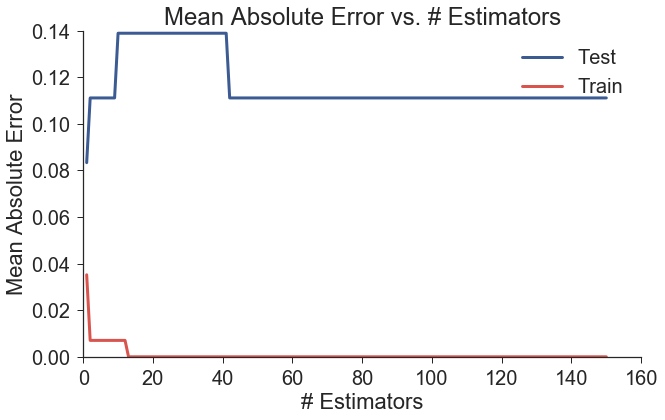

In [72]:
ax = plot_mean_abs_error(X_train, X_test, y_train, y_test, 150, check_random_state(0), t_best_max_depth)

In [73]:
assert_is_instance(ax, mpl.axes.Axes, msg="Your function should return a matplotlib.axes.Axes object.")

assert_equal(len(ax.lines), 2)

assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

handles, labels = ax.get_legend_handles_labels()
assert_equal(set(labels), set(['Train', 'Test']), msg="Make sure you have correct line labels.")

lines = ax.get_lines()
train = [l for l in lines if l.get_label()=='Train'][0]
test = [l for l in lines if l.get_label()=='Test'][0]

train_xdata = train.get_xdata()
train_ydata = train.get_ydata()

test_xdata = test.get_xdata()
test_ydata = test.get_ydata()

assert_array_almost_equal(train_xdata[:5], [1, 2, 3, 4, 5])
assert_array_almost_equal(train_ydata[:5], [0.03521127,  0.00704225,  0.00704225,  0.00704225,  0.00704225])

assert_array_almost_equal(test_xdata[:5], [1, 2, 3, 4, 5])
assert_array_almost_equal(test_ydata[:5], [0.08333333,  0.11111111,  0.11111111,  0.11111111,  0.11111111])